Example 5 - Cross-coupled bearings.
=====
In this example, we use the rotor seen in Example 5.9.4 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.

This system is the same as that of
Example 3, except that some coupling is introduced in the bearings between the x and y directions. The bearings have direct stiffnesses of $1 MN/m$ and cross-coupling stiffnesses of $0.5 MN/m$.

In [1]:
from bokeh.io import output_notebook
import ross as rs
import numpy as np
output_notebook()

Loading BokehJS ...

(Figure(id='1003', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83bc29df60>)

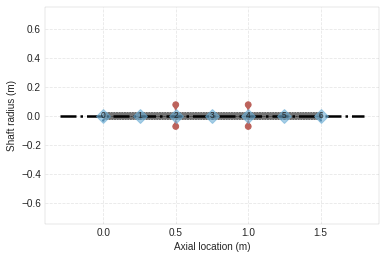

In [2]:
#Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
Steel = rs.steel
for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=Steel, n=i, i_d=0, o_d=0.05))
    
disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )

bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, kxy=.5e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=6, kxx=1e6, kyy=1e6, kxy=.5e6, cxx=0, cyy=0))

rotor594c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_seal_elements=bearing_seal_elements,
                     disk_elements=disk_elements,n_eigen = 12)

rotor594c.plot_rotor()

(Figure(id='1858', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83ada69ef0>)

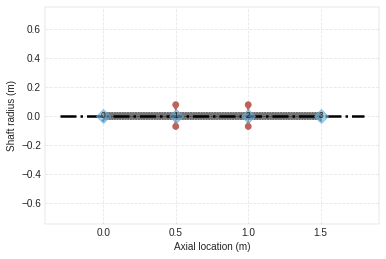

In [3]:
#From_section class method instantiation.
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=1e6, cxx=0, cyy=0))

rotor594fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements,leng_data=shaft_length_data,
                                   i_ds_data=i_d,o_ds_data=o_d
                                  )
rotor594fs.plot_rotor()


In [4]:
#Obtaining results for w=0 (wn is in rad/s)


print('Normal Instantiation =', rotor594c.wn)
print('\n')
print('From Section Instantiation =', rotor594fs.wn)

Normal Instantiation = [ 86.65808619  86.65814251 274.31285373 274.31285411 716.78471745
 716.78790695]


From Section Instantiation = [ 86.65926451  86.65926451 274.37573752 274.37573752 718.87267817
 718.87267818]


In [5]:
#Obtaining results for w=4000RPM (wn is in rad/s)

rotor594c.w=4000*np.pi/30

print('Normal Instantiation =', rotor594c.wn)

Normal Instantiation = [ 84.19790045  89.03269396 246.44121183 301.08623205 594.81950178
 834.0420378 ]
